In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\KDDCup99.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [3]:
df.print(f"Dataset information:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [4]:
#Different attack types
print(f"Original attack types:\n{df['label'].value_counts()}")

Original attack types:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


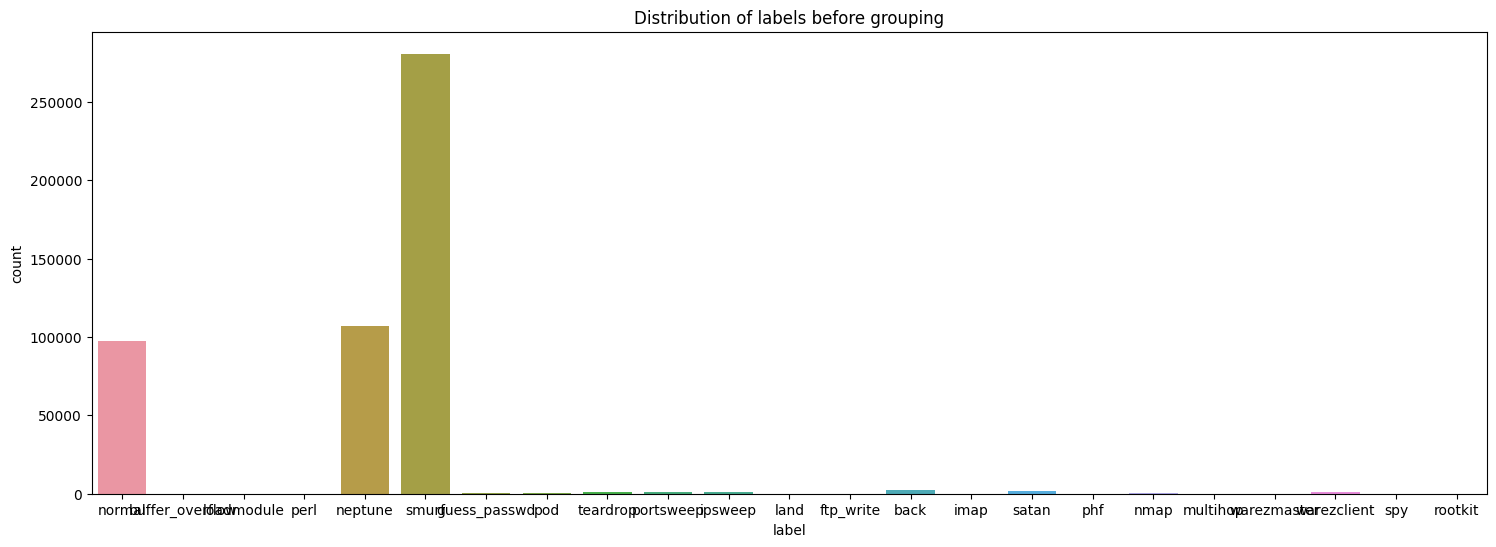

In [5]:
# visualization of labels before grouping
plt.figure(figsize=(18, 6))
plt.title("Distribution of labels before grouping")
sns.countplot(data=df, x='label')
plt.show()
     

In [6]:

# Grouping labels
attacks = {
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'
}

df['label'].replace(attacks, inplace=True)
print(f"Grouped attack types:\n{df['label'].value_counts()}")

Grouped attack types:
dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: label, dtype: int64


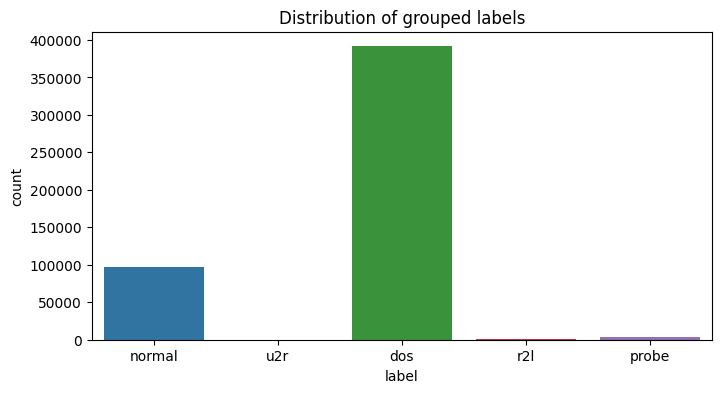

In [7]:
# visualization of labels after grouping
plt.figure(figsize=(8, 4))
plt.title("Distribution of grouped labels")
sns.countplot(data=df, x='label')
plt.show()
     

In [8]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f"Categorical features: {categorical_cols}")

Categorical features: ['protocol_type', 'service', 'flag', 'label']


In [9]:
# replacing protocol type
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [10]:
protocol_types_dict = {
    'tcp': 0,
    'udp': 1,
    'icmp': 2
}

df['protocol_type'].replace(protocol_types_dict, inplace=True)

print(f"Mapped protocol types:{df['protocol_type'].unique()}")

Mapped protocol types:[0 1 2]


In [11]:
print(f"Possible values for flag:\n{df['flag'].unique()}")

Possible values for flag:
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']


In [12]:
flag_map = {
    'SF': 0, 'S1': 1, 'REJ': 2,
    'S2': 3, 'S0': 4, 'S3': 5,
    'RSTO': 6, 'RSTR': 7,  'RSTOS0': 8, 
    'OTH': 9, 'SH': 10
}

df['flag'].replace(flag_map, inplace=True)

print(f"Mapped flags:\n{df['flag'].unique()}")

Mapped flags:
[ 0  1  2  3  4  5  6  7  8  9 10]


In [13]:
print(f"Possible values for service:\n{df['service'].unique()}")
     

Possible values for service:
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']


In [14]:
service_map = {}
for i, service in enumerate(df['service'].unique()):
  service_map[service] = i

df['service'].replace(service_map, inplace=True)

print(f"Mapped values for service:\n{df['service'].unique()}")

Mapped values for service:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


<AxesSubplot: >

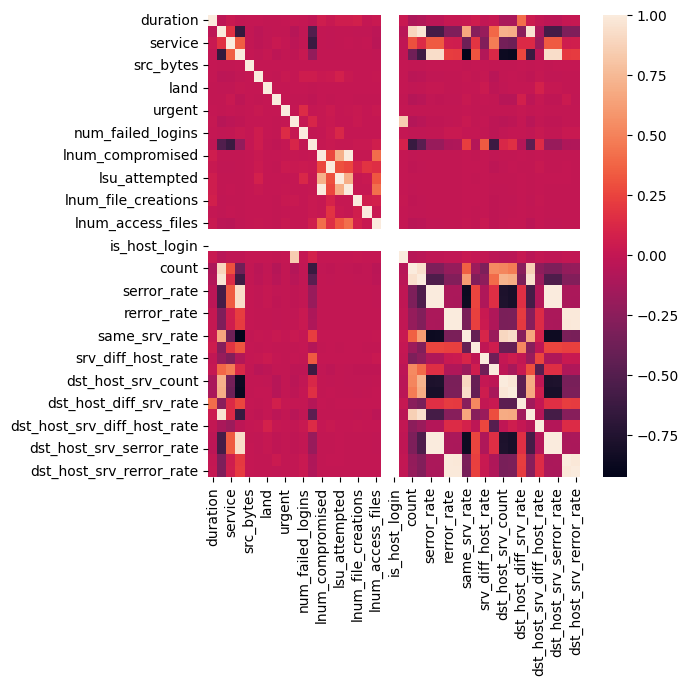

In [15]:
#columns correlation in order to remove the columns with the most correlated ones
fig, ax = plt.subplots(figsize=(6,6))       
sns.heatmap(df.corr(), ax=ax)

<AxesSubplot: >

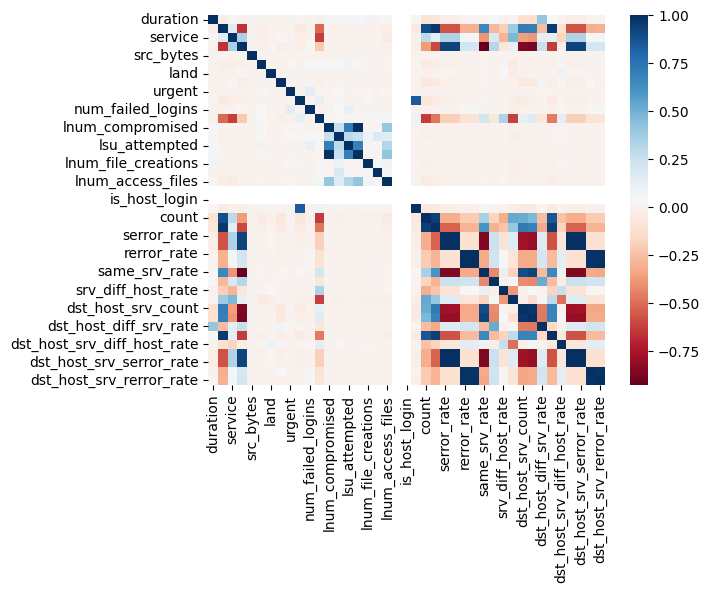

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')


In [17]:
# The column rerror_rate is very correlated to dst_host_srv_serror_rate, dst_host_serror_rate.

#dst_host_serror_rate, dst_host_rerror_rate, dst_host_srv_count and same_srv_rate are all correlated. 
# We can remove all but one
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

# The column srv_rerror_rate is very correlated to dst_host_srv_rerror_rate, dst_host_srv_serror_rate.
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

# The columns lnum_compromised and lnum_root count, dst_host_rerror_rate and dst_host_srv_rerror_rate,
# dst_host_serror_rate and dst_host_srv_serror_rate, rerror_rate and srv_rerror_rate, serror_rate and srv_serror_rate,
# count and dst_host_same_src_port_rate, dst_host_srv_count and dst_host_same_srv_count,  are very correlated
df.drop('lnum_root',axis = 1, inplace=True)
df.drop('srv_count',axis = 1, inplace=True)
df.drop('srv_rerror_rate',axis= 1, inplace=True)
df.drop('srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)
df.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)

In [18]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,label
0,0,0,0,0,181,5450,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.0,normal
1,0,0,0,0,239,486,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.0,normal
2,0,0,0,0,235,1337,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.0,normal
3,0,0,0,0,219,1337,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.0,normal
4,0,0,0,0,217,2032,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.0,normal


Train-test split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1),
                                                    df["label"],
                                                    test_size=0.25,
                                                    random_state=101)

print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")
     

Shape of training dataset: (370515, 31)
Shape of testing dataset: (123505, 31)


In [21]:
# checking label proportions
print(f"Labels in the training data: \n{y_train.value_counts() / y_train.shape[0]}\n")
print(f"Labels in the testing data: \n{y_test.value_counts() / y_test.shape[0]}")

Labels in the training data: 
dos       0.792902
normal    0.196470
probe     0.008234
r2l       0.002286
u2r       0.000108
Name: label, dtype: float64

Labels in the testing data: 
dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64


Sampled versions

In [22]:
sampled_df = df.sample(n=100_000)
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(sampled_df.drop("label", axis=1),
                                                                                    sampled_df["label"],
                                                                                    test_size=0.25,
                                                                                    random_state=101)

In [23]:
print(f"Label support in the sampled dataset: \n{sampled_df['label'].value_counts() / sampled_df.shape[0]}")
print(f"Label support in the sampled dataset: \n{y_train_sampled.value_counts() / y_train_sampled.shape[0]}")
print(f"Label support in the sampled dataset: \n{y_test_sampled.value_counts() / y_test_sampled.shape[0]}")

Label support in the sampled dataset: 
dos       0.79346
normal    0.19590
probe     0.00821
r2l       0.00232
u2r       0.00011
Name: label, dtype: float64
Label support in the sampled dataset: 
dos       0.793827
normal    0.195440
probe     0.008307
r2l       0.002347
u2r       0.000080
Name: label, dtype: float64
Label support in the sampled dataset: 
dos       0.79236
normal    0.19728
probe     0.00792
r2l       0.00224
u2r       0.00020
Name: label, dtype: float64


In [24]:
X_train.to_csv("kdd99_training_data.csv")
X_test.to_csv("kdd99_testing_data.csv")
y_train.to_csv("kdd99_training_labels.csv")
y_test.to_csv("kdd99_testing_labels.csv")

X_train_sampled.to_csv("sampled_kdd99_training_data.csv")
X_test_sampled.to_csv("sampled_kdd99_testing_data.csv")
y_train_sampled.to_csv("sampled_kdd99_training_labels.csv")
y_test_sampled.to_csv("sampled_kdd99_testing_labels.csv")